<a href="https://colab.research.google.com/github/JuannMontoya/colab_signals_and_systems/blob/main/Parcial_1_SYS_1002799788.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simular la señal Punto 1
--
$x(t) = 0.3cos(1000π t - π/4) + 0.6sin(2000πt) + 0.1cos(11000πt-π) $

Al comienzo nos dieron un $F_s = 5KHz$ pero demostramos que si hacemos la hacemos con esta frecuencia de muestreo nos generara un **alising** entonces para solucionar esto elegiremos una $F_s = 2F_{masAlta} = 2(5500)=11000Hz$

en los apuntes anexados en este libro se encuentra la demostracion que se hizo


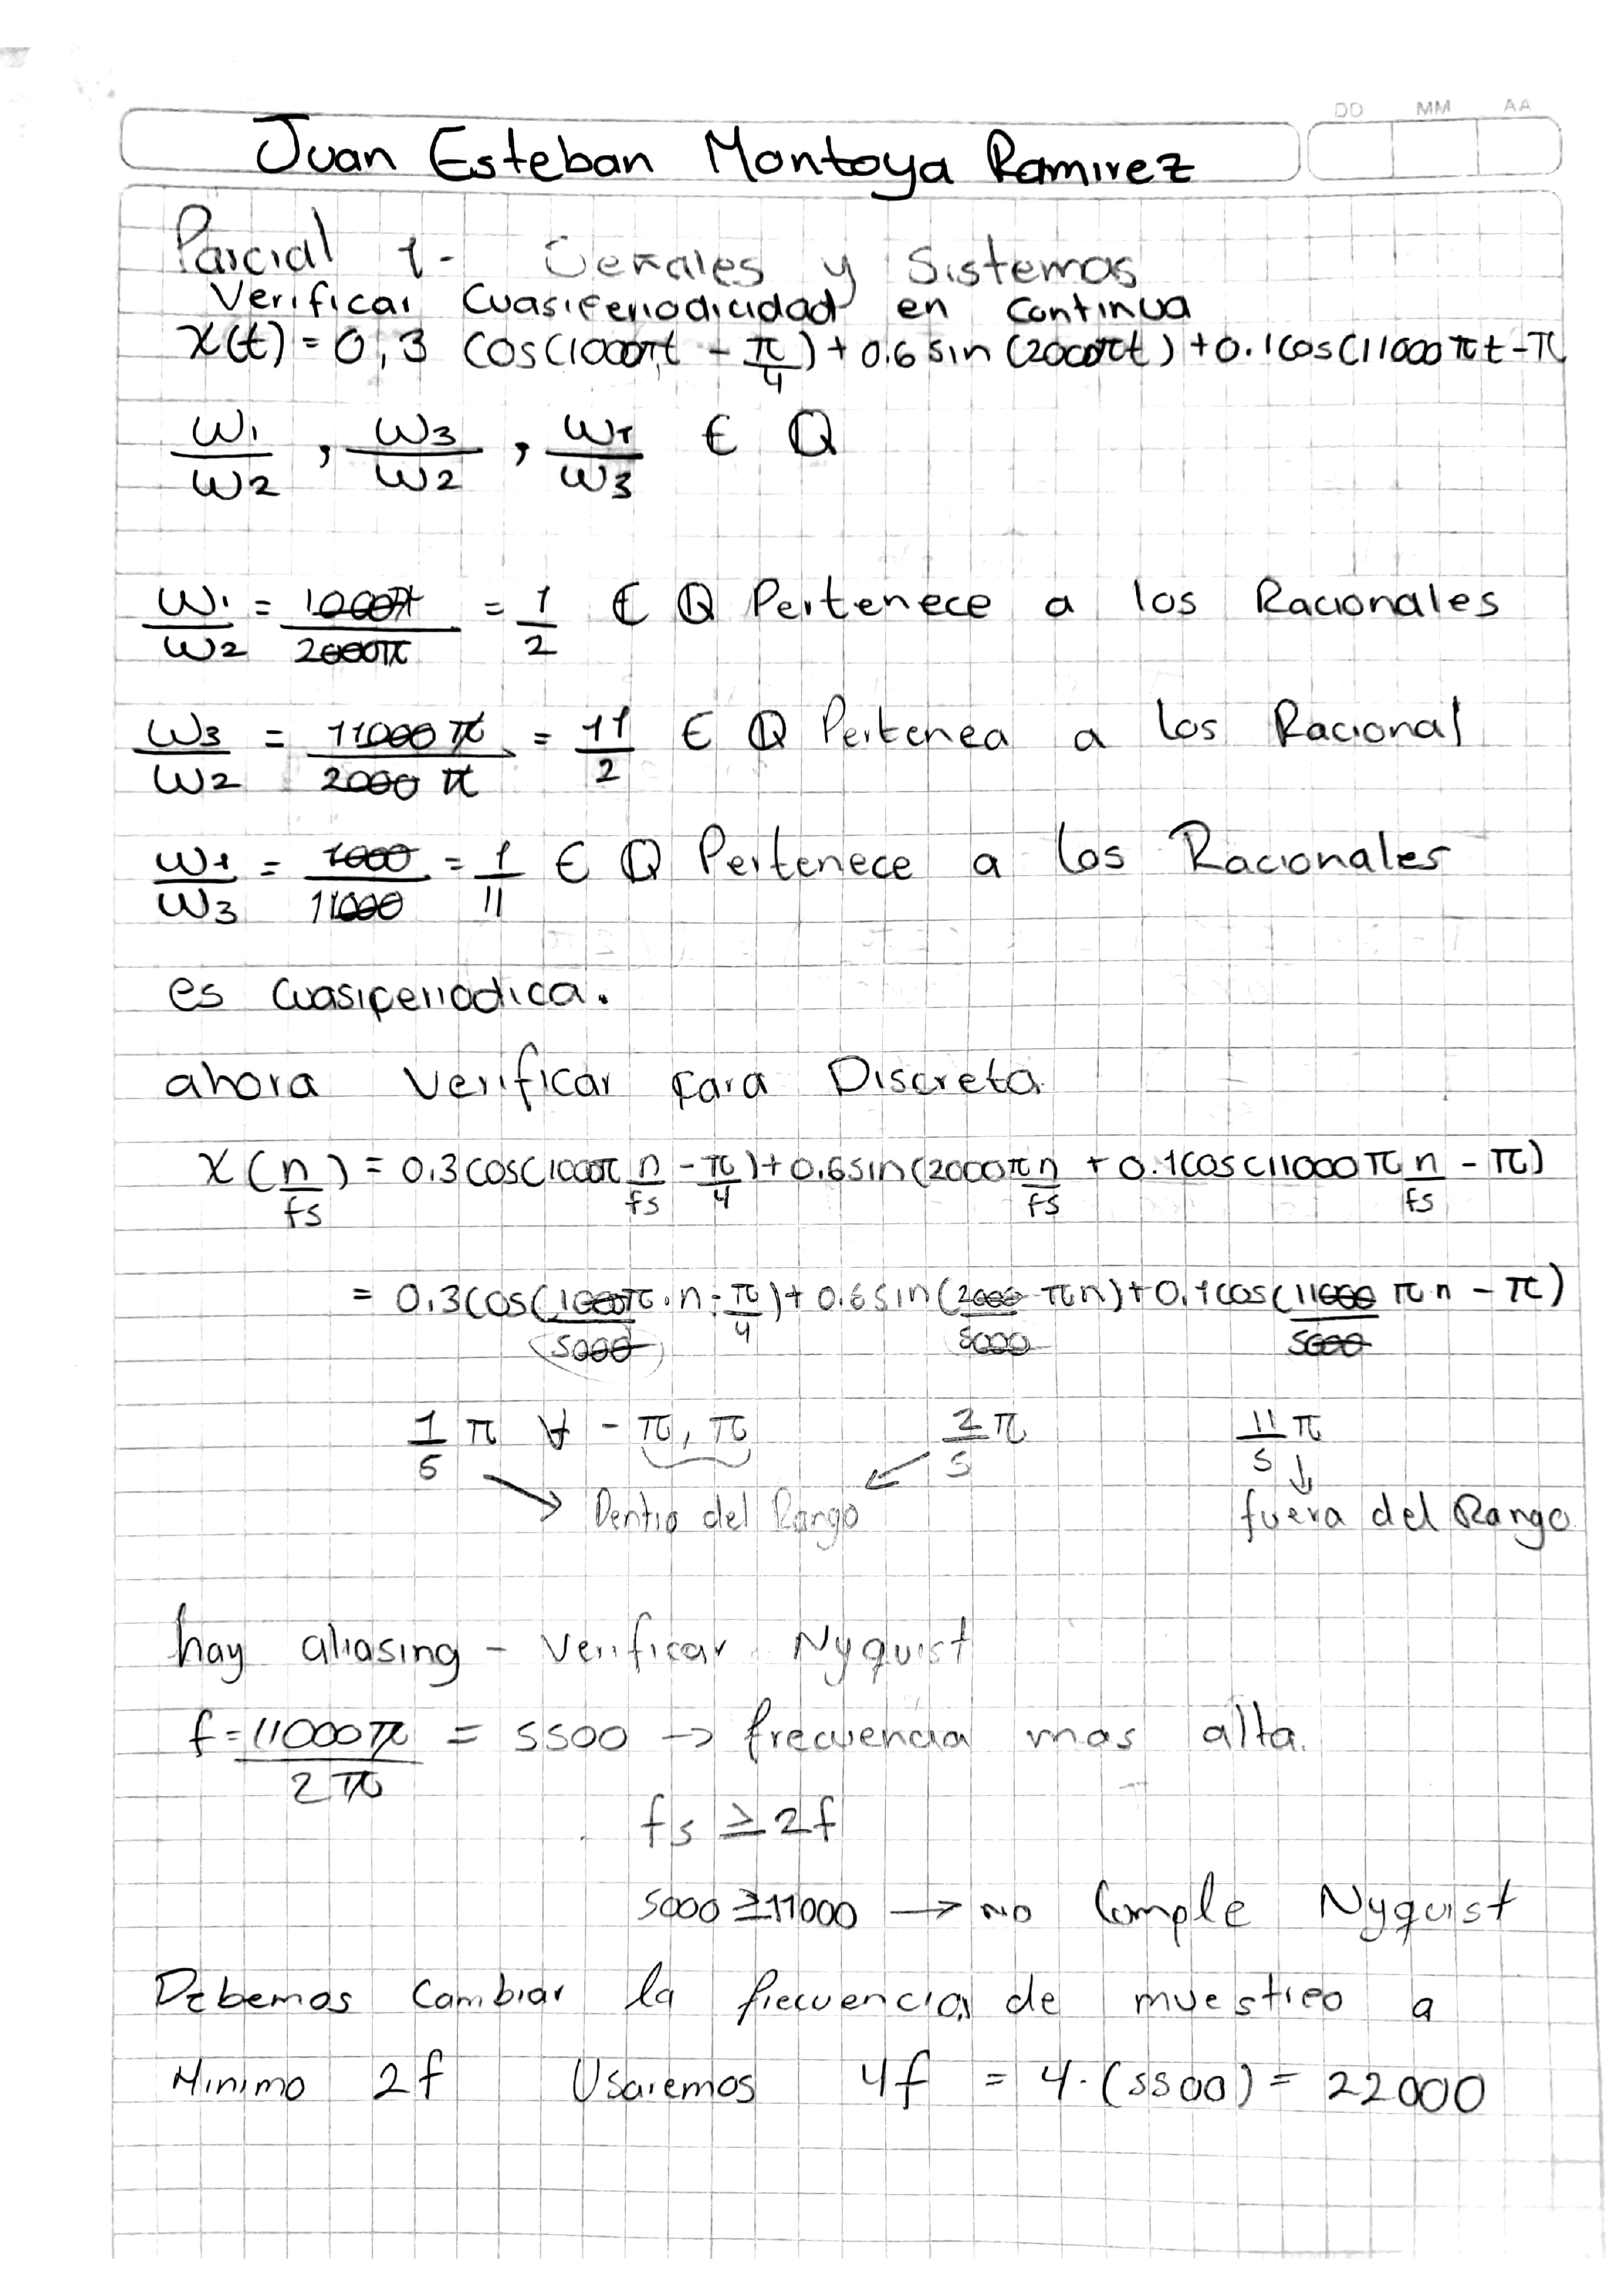

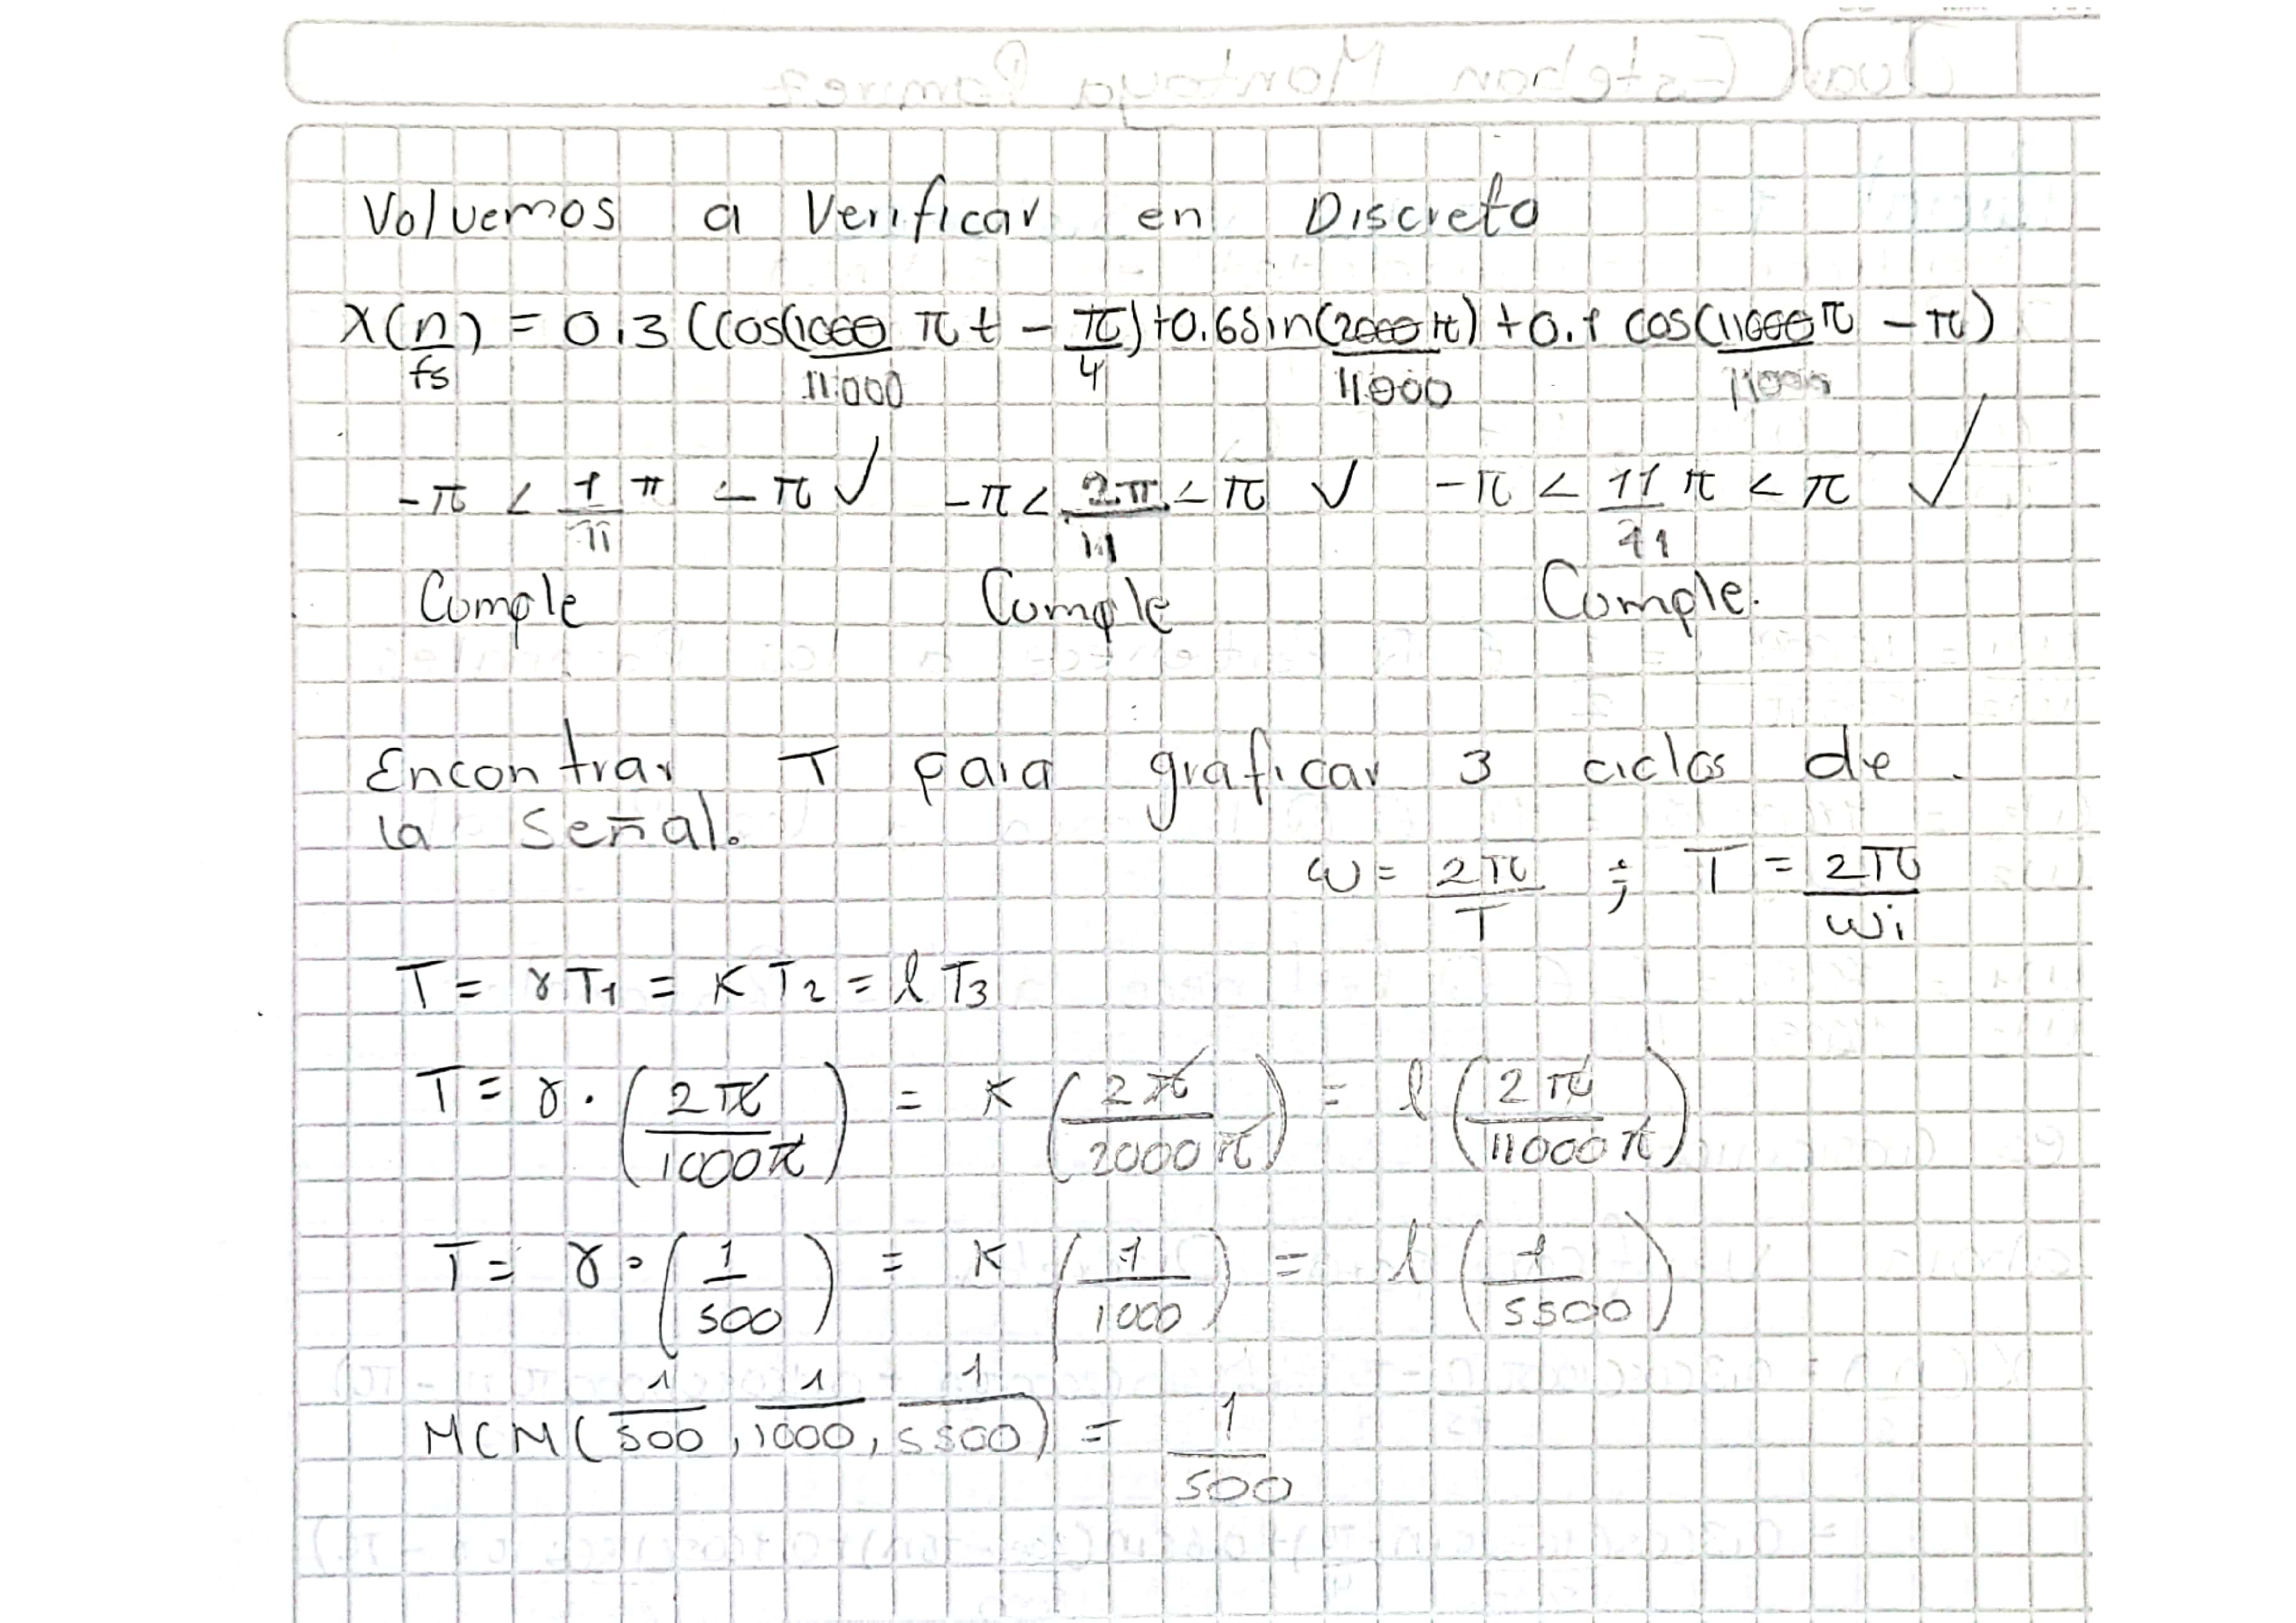

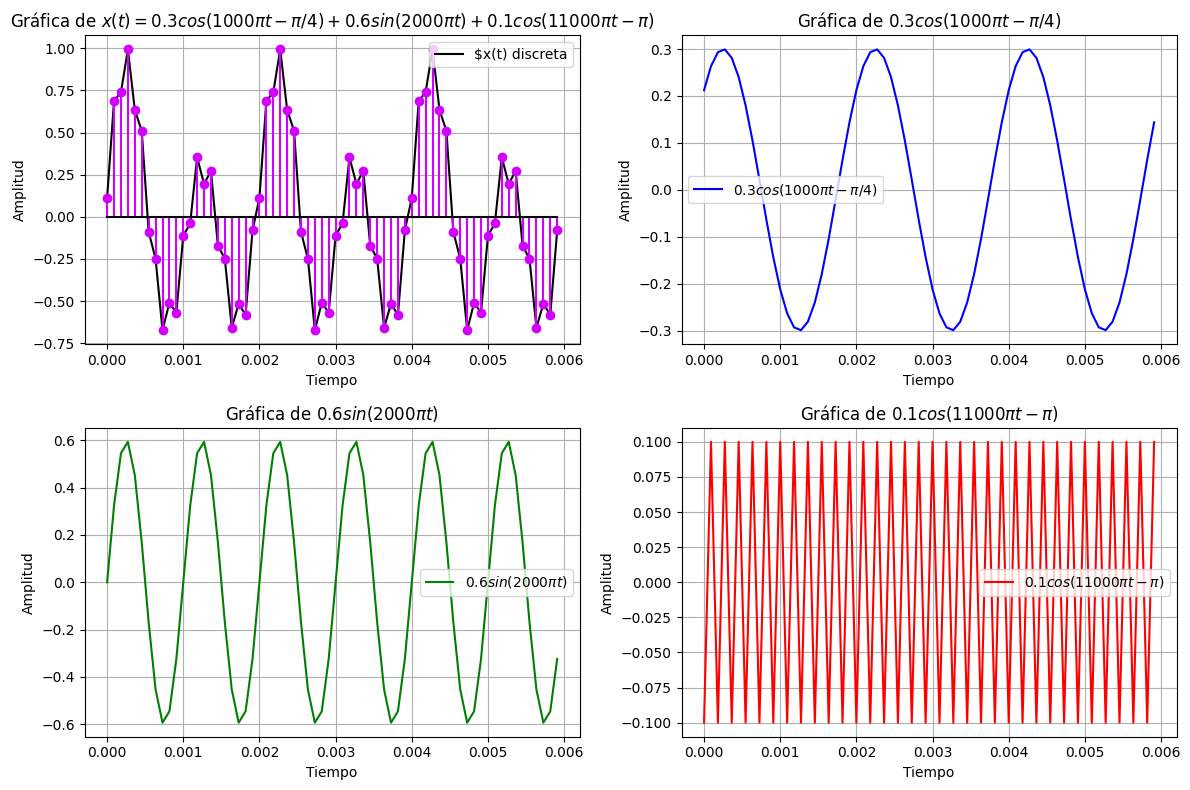

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


#declaracion de variables a usar

F_A = 5500 # frecuencia mas alta
T_A = 1/F_A # periodo mas alto
F_s = 2 * F_A # frecuencia de muestreo
T_s = 1/F_s # periodo de muestreo
T = 1/500 # Periodo de la funcion x(t)
ti = 0 #tiempo inicial
tf = 3*T  #tiempo final
Nbits = 5 # numero de bits

# omega de cada señal
w1 = 1000 * np.pi
w2 = 2000  * np.pi
w3 = 11000  * np.pi

tv = np.arange(tu,tf,T_s)

y1 = 0.3 * np.cos(w1 * tv-np.pi/4)
y2 = 0.6 * np.sin(w2 * tv)
y3 = 0.1 * np.cos(w3*tv-np.pi)
y = y1 + y2 + y3




fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Primera gráfica: stem para y
axs[0, 0].plot(tv, y, 'black', label='$x(t) discreta')
axs[0, 0].stem(tv, y, linefmt='#d100ff', markerfmt='#d100ff', basefmt='black', label='')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].set_title('Gráfica de $x(t) = 0.3cos(1000π t - π/4) + 0.6sin(2000πt) + 0.1cos(11000πt-π) $')
axs[0, 0].legend()
axs[0, 0].grid()

# Segunda gráfica: plot para y1
axs[0, 1].plot(tv, y1, 'b', label='$0.3cos(1000π t - π/4)$')
axs[0, 1].set_xlabel('Tiempo')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].set_title('Gráfica de $0.3cos(1000π t - π/4)$')
axs[0, 1].legend()
axs[0, 1].grid()

# Tercera gráfica: plot para y2
axs[1, 0].plot(tv, y2, 'g', label='$0.6sin(2000πt)$')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].set_title('Gráfica de $0.6sin(2000πt)$')
axs[1, 0].legend()
axs[1, 0].grid()

# Cuarta gráfica: plot para y3
axs[1, 1].plot(tv, y3, 'r', label='$0.1cos(11000πt-π)$')
axs[1, 1].set_xlabel('Tiempo')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].set_title('Gráfica de $0.1cos(11000πt-π)$')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()


Ahora se debe hacer 3 cosas importantes


*   Pasar la funcion por un cero y pendiente para estar en los rangos deseados los cuales son -3.3 y 3.3 [V] en amplitud
*   Pasar la funcion por un cuantizador con los intervalos deseados el cual en este caso debemos dividir el intervalo de -3.3 a 3.3 en 5 bits

*   Por ultimo se digitaliza pasando los valores de y a los valores cercanos de la cuantizacion

utilizamos las funciones dadas en clase de pendiente y cuantizador para la solucion.




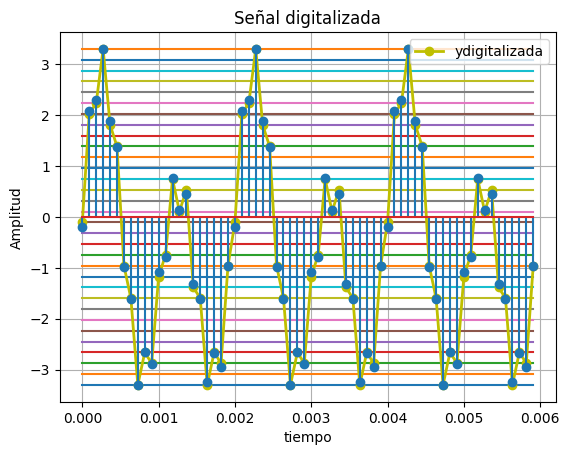

In [ ]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
y = my_ceropen(y,-3.3,3.3)
vq = np.linspace(-3.3,3.3,Nbits)

#distancias y cero pendiente a vector cuantizacion
d = cdist(y.reshape(-1,1),vq.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(y[i],vq)) #apilar datos cuantizando si i>0

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydigitalizada', linewidth=2)
plt.title('Señal digitalizada')
plt.stem(tv,y,label='')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


La señal al obtenerla digitalizada (grafica final) vemos que se acomoda en buena forma a los bits disponibles.

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 03:18:02--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 173.194.216.100, 173.194.216.138, 173.194.216.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 03:18:02--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s   

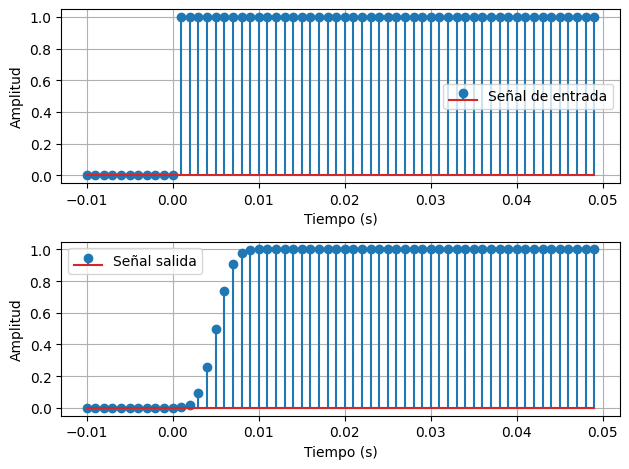

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.05, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()


# Invariante en el tiempo

Para revisar si es invariante en el tiempo debemos trasladar la señal en el tiempo y nos debe dar igual solo que en tiempo desplazado

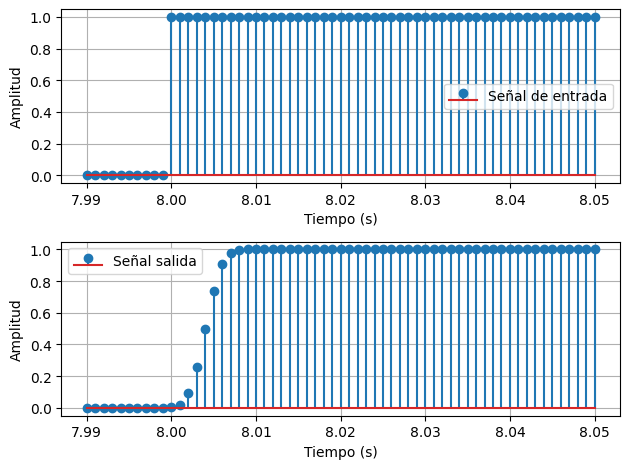

In [ ]:


#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(7.99, 8.05, 1/fs)  # Tiempo
signal_t = np.heaviside(t-8,1) # función heaviside
y_u = my_system.predict(signal_t)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_t, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()


como vimos variamos la señal en un tiempo de t - 8 y aqui vemos que sigue dando la misma señal solo que desplazada en el tiempo

Verificacion de linealidad
---
Para verificar esto verificaremos que sean escalables y que sean lineales en la suma:



*   le sumaremos otra señal y compararemos si la suma de las señales pasadas por la caja negra es igual a pasar cada señal por la caja negra y luego sumarlas
*   se le multiplicara valores escalares para verificar que sea escalable


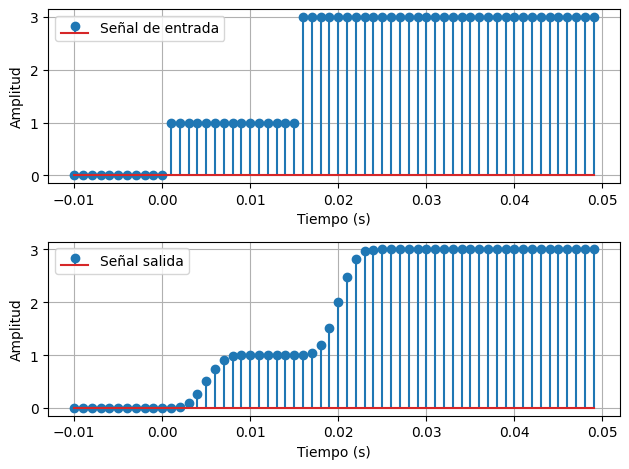

In [ ]:
#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.05, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
signal_b = 2*np.heaviside(t-0.015,1)
tf = signal_b + signal_u
y_u = my_system.predict(tf)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u + signal_b, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

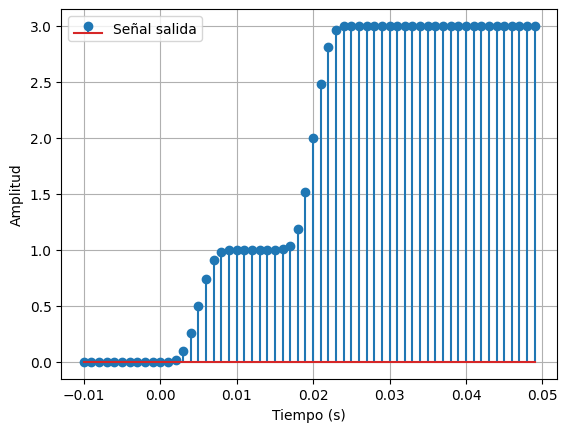

In [ ]:
#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.05, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
signal_b = 2*np.heaviside(t-0.015,1)
salidasu = my_system.predict(signal_u)
salidasb = my_system.predict(signal_b)
y_sub = salidasu + salidasb


# Visualización de las señales
plt.stem(t,(y_sub), label='Señal salida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

ya verificamos que las suma de señales y pasarlas por la caja negra es igual a pasarlas por la caja negra a cada una y sumar sus salidas, nos da igual en ambos casos.

como podemos ver en este los valores punto a punto son iguales.


respuesta al impulso
---

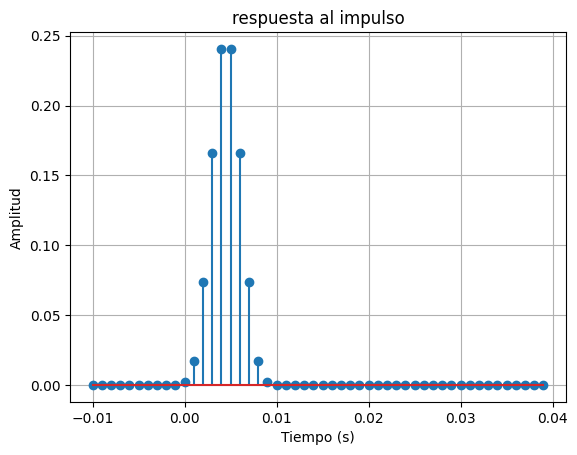

In [ ]:
#ORIGINAL
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.04, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


h=np.diff(y_u) #Derivada respuesta al escalon
plt.stem(t,np.append(h,0))
plt.title('respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

esta respuesta al impulso al pasarla por la caja negra


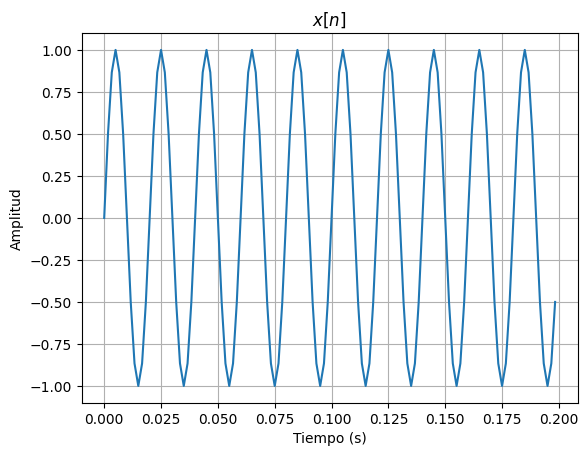

In [ ]:
#señal dada, graficamos primero para tener un poco de la idea de como se ve la señal original

n = np.arange(0,0.2,1/600)
yfinal = np.sin(100*np.pi*n)+np.sin(600*np.pi*n)
plt.plot(n,yfinal)
plt.title('$x[n]$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

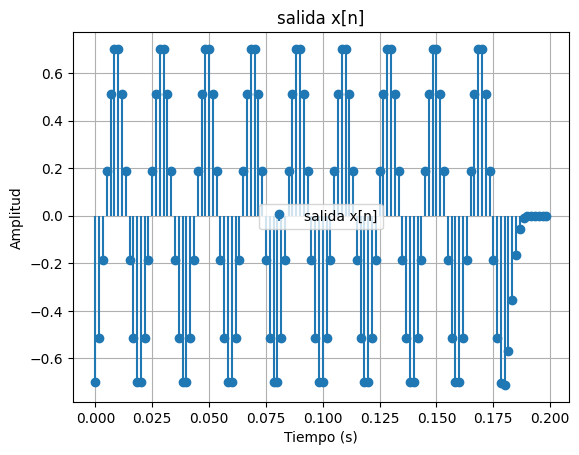

In [ ]:
ycon = np.convolve(h,yfinal,mode='same')
plt.stem(n, ycon, basefmt=" ", label='salida x[n]')
plt.title('salida x[n]')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()